C:\Users\erick\Documents\Python\grocery_fcst\forecast_engine\utils.py:107: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[comb_col].fillna(df[dep], inplace=True)


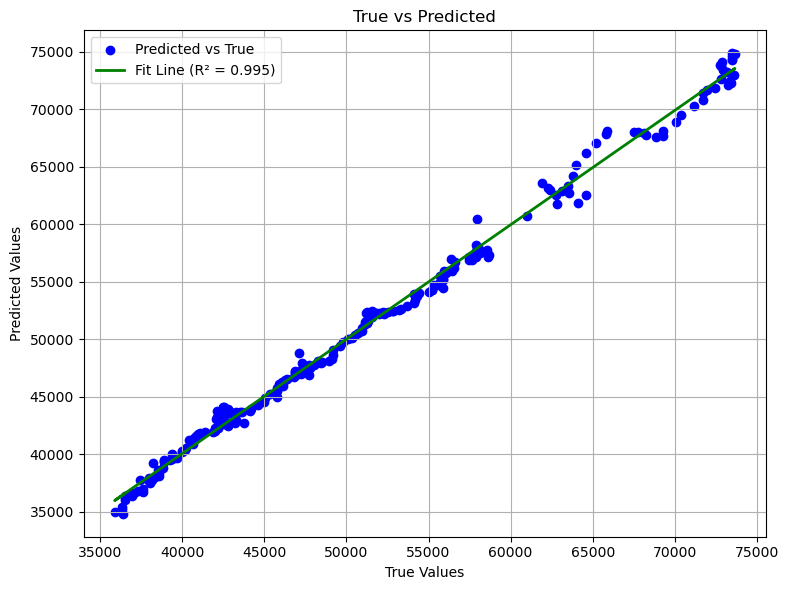

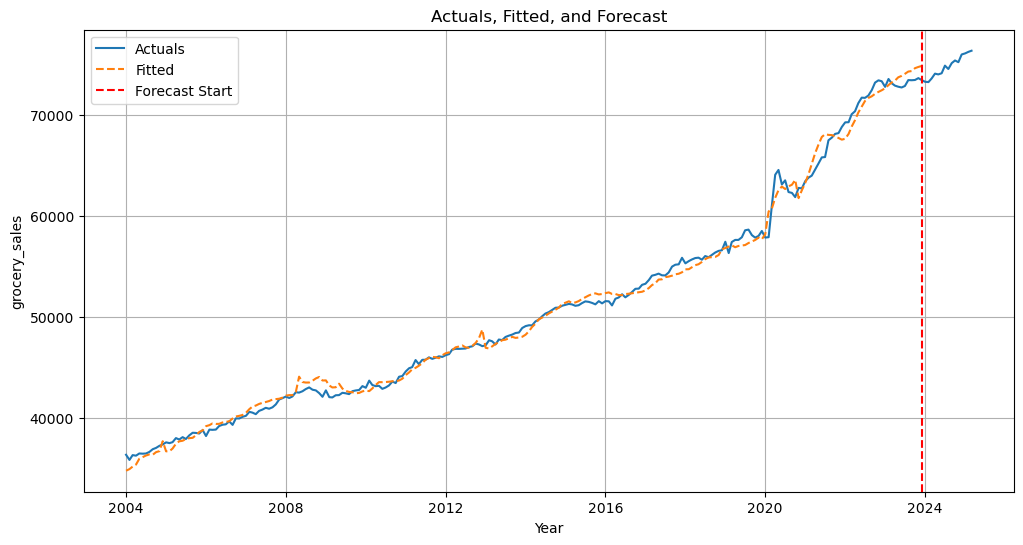

In [1]:
# --- 1. Load Packages and Data ---
import pandas as pd
from forecast_engine import (
    filter_by_date_range,
    fit_ols_statsmodels, predict_ols_statsmodels, add_fitted_and_residuals,
    add_comb_and_flag,
    plot_true_vs_predicted, plot_actual_vs_fitted_vs_forecast
)

# Load data
df = pd.read_csv('grocery_eda_dataset.csv', parse_dates=['date'])
df = df.set_index('date')

# --- 2. Define Parameters ---
dep = 'grocery_sales'
ind = ['cpi_fah', 'rdi_adj', 'home_price', 'covid1', 'covid2']

start_training_date = '2004-01-01'
end_training_date = '2023-12-31'

start_test_date = '2024-01-01'
end_test_date = '2025-03-31'

# --- 3. Filter Data ---
df_train = filter_by_date_range(df, start_training_date, end_training_date)
df_test = filter_by_date_range(df, start_test_date, end_test_date)

X_train = df_train[ind]
y_train = df_train[dep]

X_test = df_test[ind]

# --- 4. Fit and Predict with OLS ---
model, y_fitted = fit_ols_statsmodels(X_train, y_train)
y_forecast = predict_ols_statsmodels(X_test, model)

# --- 5. Combine Fitted + Forecast ---
df_train = add_fitted_and_residuals(df_train, y_train, y_fitted)
df_test['y_fcst_ols'] = y_forecast

df_combined = pd.concat([df_train, df_test])
df_combined = add_comb_and_flag(df_combined, dep, forecast_col='y_fcst_ols')

# --- 6. Plot Diagnostics ---
plot_true_vs_predicted(y_train, y_fitted)
plot_actual_vs_fitted_vs_forecast(df_combined, dep)
